# Gene-Peak Clusters

**Created**: 19 January 2022

## Environment

In [1]:
if (!requireNamespace("rtracklayer", quietly=T)) {
    install.packages("rtracklayer")
}

if (!requireNamespace("ComplexHeatmap", quietly=TRUE)) {
    BiocManager::install("ComplexHeatmap")
}

In [2]:
library(tidyverse)
library(RColorBrewer)
library(data.table)
library(rtracklayer)
library(ComplexHeatmap)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package:

## Load Data

In [3]:
peaks <- fread("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/peak_counts.tsv", sep="\t")

In [4]:
head(peaks)

GeneID,Chr,Start,End,Strand,Calderon-1001-Central_memory_CD8pos_T-Treatment_1,Calderon-1002-Effector_CD4pos_T-Control,Calderon-1004-Monocytes-Treatment_1,Calderon-1001-Mem_B-Treatment_1,Calderon-1002-Follicular_T_Helper-Control,⋯,Calderon-1010-Monocytes-Treatment_2,Calderon-1001-Effector_memory_CD8pos_T-Control,Calderon-1001-Effector_memory_CD8pos_T-Treatment_1,Calderon-1001-Gamma_delta_T-Control,Calderon-1001-Follicular_T_Helper-Control,Calderon-1002-Gamma_delta_T-Control,Calderon-1002-Gamma_delta_T-Treatment_1,Calderon-1010-Naive_Tregs-Treatment_2,Calderon-1001-Naive_CD8_T-Control,Calderon-1001-Plasmablasts-Control
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1:23224-23849,1,23224,23849,+,50,51,64,36,29,⋯,34,28,50,24,46,57,45,36,9,63
1:24025-26778,1,24025,26778,+,152,203,300,162,131,⋯,166,174,191,106,240,190,129,184,121,256
1:28524-30136,1,28524,30136,+,1046,302,299,1286,472,⋯,282,1929,1247,2607,1225,399,569,608,590,1468
1:30354-30875,1,30354,30875,+,16,31,31,24,16,⋯,31,33,30,6,25,30,24,52,9,28
1:31109-31894,1,31109,31894,+,44,51,58,51,28,⋯,53,67,57,36,71,64,55,73,23,82
1:32151-32330,1,32151,32330,+,4,15,18,6,16,⋯,9,12,15,8,4,12,7,19,10,10


In [5]:
peaks.info <- peaks[,1:5] %>%
    dplyr::select(PeakID=GeneID, Peak.Chr=Chr, Peak.Start=Start, Peak.End=End)

head(peaks.info)

PeakID,Peak.Chr,Peak.Start,Peak.End
<chr>,<chr>,<int>,<int>
1:23224-23849,1,23224,23849
1:24025-26778,1,24025,26778
1:28524-30136,1,28524,30136
1:30354-30875,1,30354,30875
1:31109-31894,1,31109,31894
1:32151-32330,1,32151,32330


In [6]:
peaks <- as.data.frame(peaks)
peaks <- peaks[,-(1:5)]
rownames(peaks) <- peaks.info$PeakID

In [7]:
head(peaks)

,Calderon-1001-Central_memory_CD8pos_T-Treatment_1,Calderon-1002-Effector_CD4pos_T-Control,Calderon-1004-Monocytes-Treatment_1,Calderon-1001-Mem_B-Treatment_1,Calderon-1002-Follicular_T_Helper-Control,Calderon-1004-Naive_Tregs-Treatment_1,Calderon-1001-Effector_CD4pos_T-Control,Calderon-1010-Follicular_T_Helper-Control,Calderon-1001-Effector_CD4pos_T-Treatment_1,Calderon-1010-Mature_NK-Treatment_2,⋯,Calderon-1010-Monocytes-Treatment_2,Calderon-1001-Effector_memory_CD8pos_T-Control,Calderon-1001-Effector_memory_CD8pos_T-Treatment_1,Calderon-1001-Gamma_delta_T-Control,Calderon-1001-Follicular_T_Helper-Control,Calderon-1002-Gamma_delta_T-Control,Calderon-1002-Gamma_delta_T-Treatment_1,Calderon-1010-Naive_Tregs-Treatment_2,Calderon-1001-Naive_CD8_T-Control,Calderon-1001-Plasmablasts-Control
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1:23224-23849,50,51,64,36,29,55,20,22,25,38,⋯,34,28,50,24,46,57,45,36,9,63
1:24025-26778,152,203,300,162,131,214,96,180,110,204,⋯,166,174,191,106,240,190,129,184,121,256
1:28524-30136,1046,302,299,1286,472,540,1599,368,1230,444,⋯,282,1929,1247,2607,1225,399,569,608,590,1468
1:30354-30875,16,31,31,24,16,22,15,19,25,23,⋯,31,33,30,6,25,30,24,52,9,28
1:31109-31894,44,51,58,51,28,56,47,57,32,47,⋯,53,67,57,36,71,64,55,73,23,82
1:32151-32330,4,15,18,6,16,24,11,13,6,15,⋯,9,12,15,8,4,12,7,19,10,10


In [8]:
atac.seq.metadata <- read.csv("03_Functional_Interpretation/metadata/reads_atac_seq.txt")

In [9]:
head(atac.seq.metadata)

,Run,Group.ID,Sample.ID,Donor,Lineage,Cell_type,Stimulated,Treatment,Replicate,Assay.Type,⋯,Experiment,Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample.Name,SRA.Study
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR2920475,Corces-4983-Monocytes-Control,Corces-4983-Monocytes-Control-1,Corces-4983,MYELOID,Monocytes,FALSE,Control,1,ATAC-Seq,⋯,SRX1427798,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937385,SRP066100
2,SRR2920488,Corces-6792-Monocytes-Control,Corces-6792-Monocytes-Control-1,Corces-6792,MYELOID,Monocytes,FALSE,Control,1,ATAC-Seq,⋯,SRX1427811,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937398,SRP066100
3,SRR2920476,Corces-4983-Monocytes-Control,Corces-4983-Monocytes-Control-2,Corces-4983,MYELOID,Monocytes,FALSE,Control,2,ATAC-Seq,⋯,SRX1427799,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937386,SRP066100
4,SRR2920487,Corces-6792-Monocytes-Control,Corces-6792-Monocytes-Control-2,Corces-6792,MYELOID,Monocytes,FALSE,Control,2,ATAC-Seq,⋯,SRX1427810,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937397,SRP066100
5,SRR2920542,Corces-7256-Monocytes-Control,Corces-7256-Monocytes-Control-1,Corces-7256,MYELOID,Monocytes,FALSE,Control,1,ATAC-Seq,⋯,SRX1427865,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937452,SRP066100
6,SRR2920543,Corces-7256-Monocytes-Control,Corces-7256-Monocytes-Control-2,Corces-7256,MYELOID,Monocytes,FALSE,Control,2,ATAC-Seq,⋯,SRX1427866,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937453,SRP066100


In [10]:
genes <- read.table("~/gains_team282/epigenetics/accessibility/analysis/rna_seq/gene_counts.tsv", header=TRUE, row.names=1, stringsAsFactors=F, check.names=F)

In [11]:
head(genes)

,Calderon-1001-Bulk_B-Control,Calderon-1001-Bulk_B-Treatment_1,Calderon-1001-CD8pos_T-Control,Calderon-1001-CD8pos_T-Treatment_1,Calderon-1001-Central_memory_CD8pos_T-Control,Calderon-1001-Central_memory_CD8pos_T-Treatment_1,Calderon-1001-Effector_CD4pos_T-Control,Calderon-1001-Effector_CD4pos_T-Treatment_1,Calderon-1001-Effector_memory_CD8pos_T-Control,Calderon-1001-Effector_memory_CD8pos_T-Treatment_1,⋯,Calderon-1010-Th17_precursors-Control,Calderon-1010-Th1_precursors-Control,Calderon-1010-Th2_precursors-Control,Calderon-1011-Monocytes-Treatment_2,Calderon-1011-Naive_B-Treatment_2,Calderon-1011-Naive_Teffs-Treatment_2,Corces-5852-Monocytes-Control,Corces-6792-Monocytes-Control,Corces-7256-Monocytes-Control,Corces-7653-Monocytes-Control
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
ENSG00000227232,13,13,6,11,15,0,17,3,45,10,⋯,0,2,0,1,3,3,2,3,0,2
ENSG00000278267,6,1,0,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000243485,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
genes.info <- import("/lustre/scratch118/humgen/resources/rna_seq_genomes/Homo_sapiens.GRCh38.99.gtf")

In [13]:
genes.info <- as.data.frame(genes.info) %>%
    dplyr::filter(gene_id %in% rownames(genes)) %>%
    dplyr::filter(type == "gene") %>%
    dplyr::select(Gene.ID=gene_id, Chr=seqnames, Start=start, End=end, Width=width, Strand=strand, Gene.Name=gene_name, Gene.Biotype=gene_biotype)

head(genes.info)

,Gene.ID,Chr,Start,End,Width,Strand,Gene.Name,Gene.Biotype
,<chr>,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>
1,ENSG00000223972,1,11869,14409,2541,+,DDX11L1,transcribed_unprocessed_pseudogene
2,ENSG00000227232,1,14404,29570,15167,-,WASH7P,unprocessed_pseudogene
3,ENSG00000278267,1,17369,17436,68,-,MIR6859-1,miRNA
4,ENSG00000243485,1,29554,31109,1556,+,MIR1302-2HG,lncRNA
5,ENSG00000284332,1,30366,30503,138,+,MIR1302-2,miRNA
6,ENSG00000237613,1,34554,36081,1528,-,FAM138A,lncRNA


In [14]:
rna.seq.metadata <- read.csv("03_Functional_Interpretation/metadata/reads_rna_seq.txt")

In [15]:
head(rna.seq.metadata)

,Run,Group.ID,Sample.ID,Donor,Lineage,Cell_type,Stimulated,Treatment,Replicate,Assay.Type,⋯,Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample.Name,source_name,SRA.Study
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR2753094,Corces-5852-Monocytes-Control,Corces-5852-Monocytes-Control-1,Corces-5852,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915599,Mono,SRP065216
2,SRR2753100,Corces-6792-Monocytes-Control,Corces-6792-Monocytes-Control-1,Corces-6792,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915605,Mono,SRP065216
3,SRR2753109,Corces-7256-Monocytes-Control,Corces-7256-Monocytes-Control-1,Corces-7256,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915614,Mono,SRP065216
4,SRR2753119,Corces-7653-Monocytes-Control,Corces-7653-Monocytes-Control-1,Corces-7653,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915624,Mono,SRP065216
5,SRR11007061,Calderon-1001-CD8pos_T-Control,Calderon-1001-CD8pos_T-Control-1,Calderon-1001,CD8,CD8pos_T,FALSE,Control,1,RNA-Seq,⋯,Illumina NovaSeq 6000,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319750,primary blood,SRP156452
6,SRR11007062,Calderon-1001-CD8pos_T-Treatment_1,Calderon-1001-CD8pos_T-Treatment_1-1,Calderon-1001,CD8,CD8pos_T,TRUE,Treatment_1,1,RNA-Seq,⋯,Illumina NovaSeq 6000,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319751,primary blood,SRP156452


## Find Overlapping Samples

A sample is uniquely identified given the donor, cell type, and treatment. I will use this to map runs between the two data modalities.

In [16]:
shared.samples <- intersect(colnames(peaks), colnames(genes))

In [17]:
peaks <- peaks[, shared.samples]

In [18]:
genes <- genes[, shared.samples]

## Peaks near Gene TSS

We define the *cis* region to be the 1 Mb region flanking the transcription start site (TSS) of a gene. I will identify peaks that are in the 1 Mb region around each gene.

In [19]:
peaks.ranges <- peaks.info %>%
    dplyr::filter(Peak.Chr %in% genes.info$Chr) %>%
    makeGRangesFromDataFrame(
        df=.,
        seqnames.field="Peak.Chr",
        start.field="Peak.Start",
        end.field="Peak.End",
        keep.extra.columns=TRUE
    )

In [121]:
cis.range <- genes.info %>%
    dplyr::filter(Gene.Name == "ZNF197") %>%
    dplyr::filter(Chr %in% peaks.info$Peak.Chr) %>%
    dplyr::mutate(TSS=ifelse(Strand == "+", Start, End)) %>%
    dplyr::mutate(Cis.Start=TSS - (10^5 / 2 - 1)) %>%
    dplyr::mutate(Cis.Start=ifelse(Cis.Start < 1, 1, Cis.Start)) %>%
    dplyr::mutate(Cis.End=TSS + (10^5 / 2)) %>%
    dplyr::mutate(Cis.End=ifelse(Cis.End < 1, 1, Cis.End)) %>%
    makeGRangesFromDataFrame(
        df=.,
        seqnames.field="Chr",
        start.field="Cis.Start",
        end.field="Cis.End",
        keep.extra.columns=TRUE
    )

In [122]:
overlaps <- findOverlaps(cis.range, peaks.ranges) %>%
    as.data.frame()

In [123]:
annot <- data.frame(chr="3", start=44721338, end=44721338) %>%
    makeGRangesFromDataFrame() %>%
    distance(., peaks.ranges[overlaps$subjectHits,])

In [124]:
gene.ids <- genes.info$Gene.ID[genes.info$Gene.Name %in% c("ZNF197", "ZNF501", "ZNF35", "ZNF660", "ZKSCAN7")]
peak.ids <- mcols(peaks.ranges[overlaps$subjectHits,])[,"PeakID"]

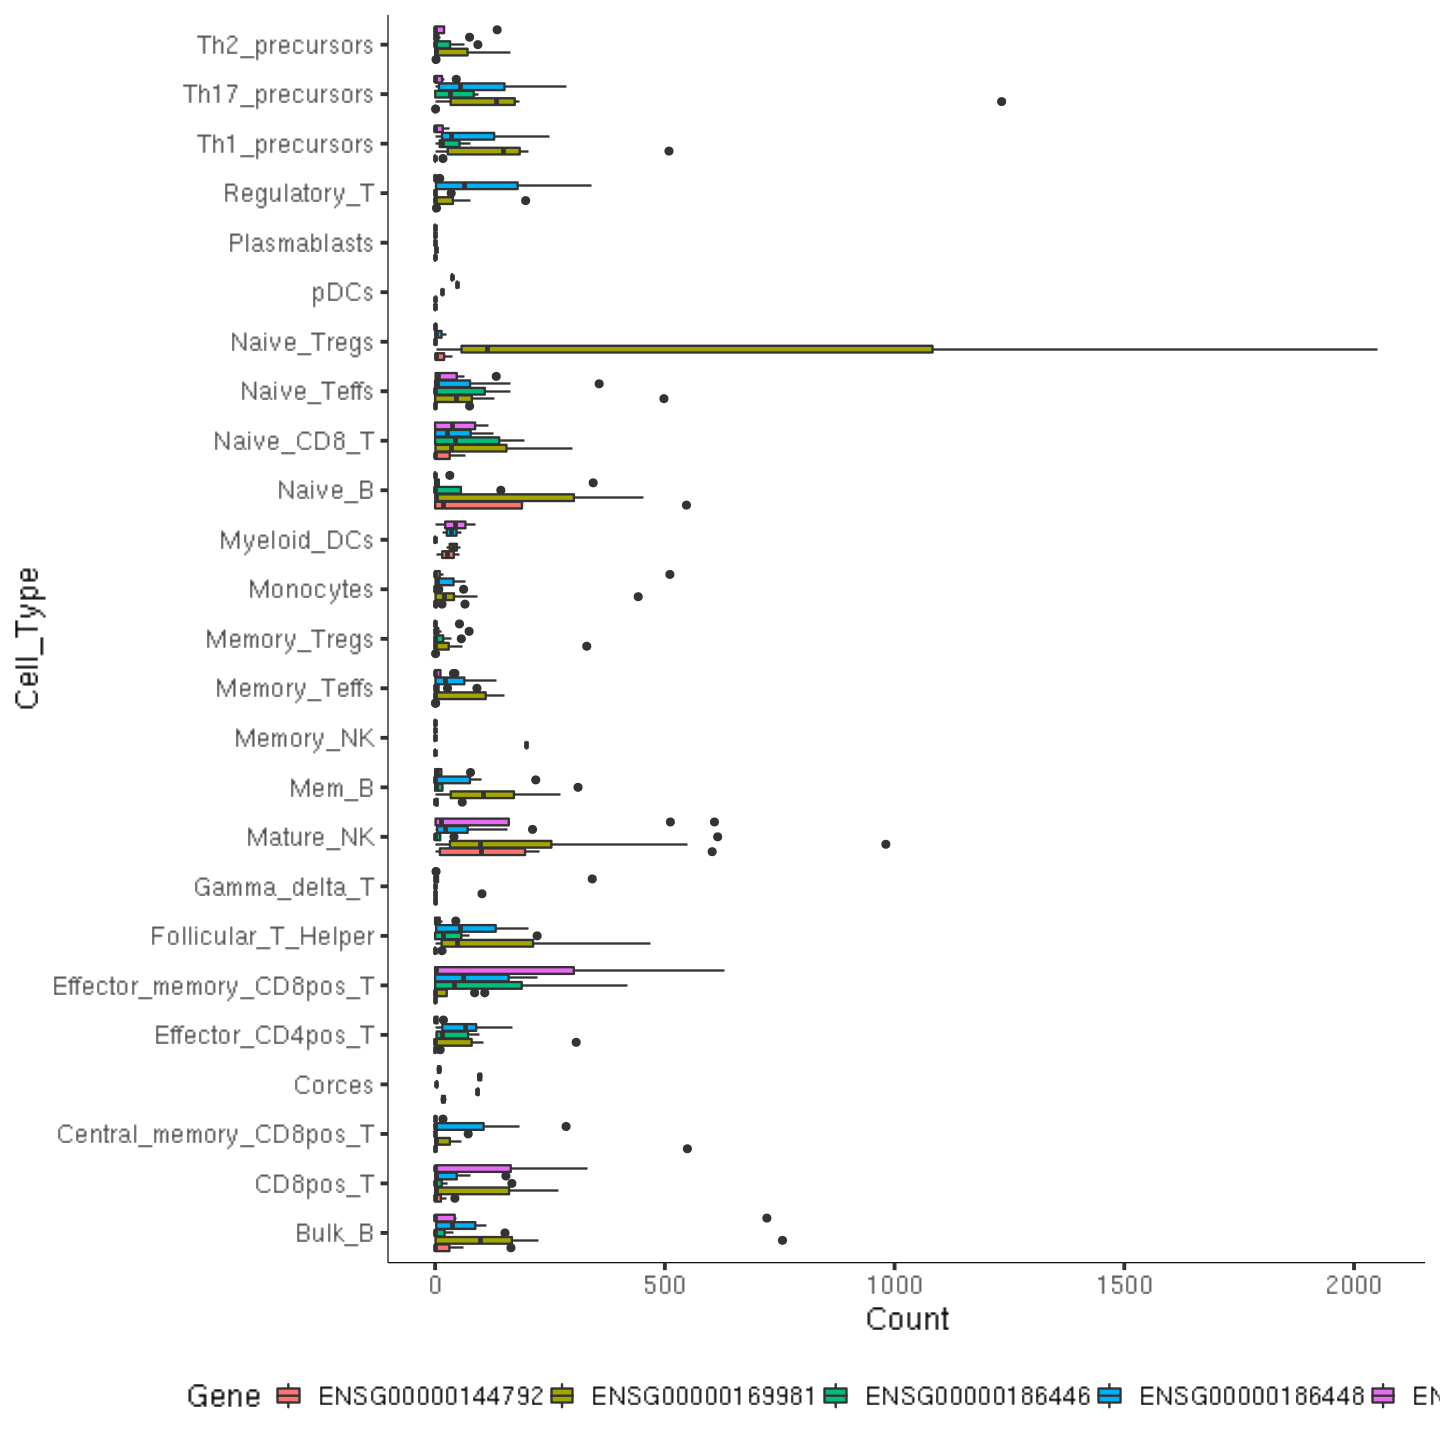

In [137]:
genes[gene.ids, ] %>%
    t() %>% as.data.frame() %>%
    dplyr::mutate(Cell_Type=gsub("-.*$", "", gsub("Calderon-[0-9]*-", "", rownames(.)))) %>%
    tidyr::gather("Gene", "Count", -Cell_Type) %>%
    ggplot() +
    geom_boxplot(aes(x=Cell_Type, y=Count, fill=Gene)) +
    coord_flip() +
    ggplot_theme

In [144]:
cor.mtx.all <- cor(t(rbind(
    peaks[peak.ids, grepl("Mature_NK", colnames(peaks))],
    genes[gene.ids, grepl("Mature_NK", colnames(genes))]
)), method="kendall")

cor.mtx <- cor.mtx.all[peak.ids, peak.ids]
cor.mtx.gene <- cor.mtx.all[gene.ids, peak.ids, drop=F]

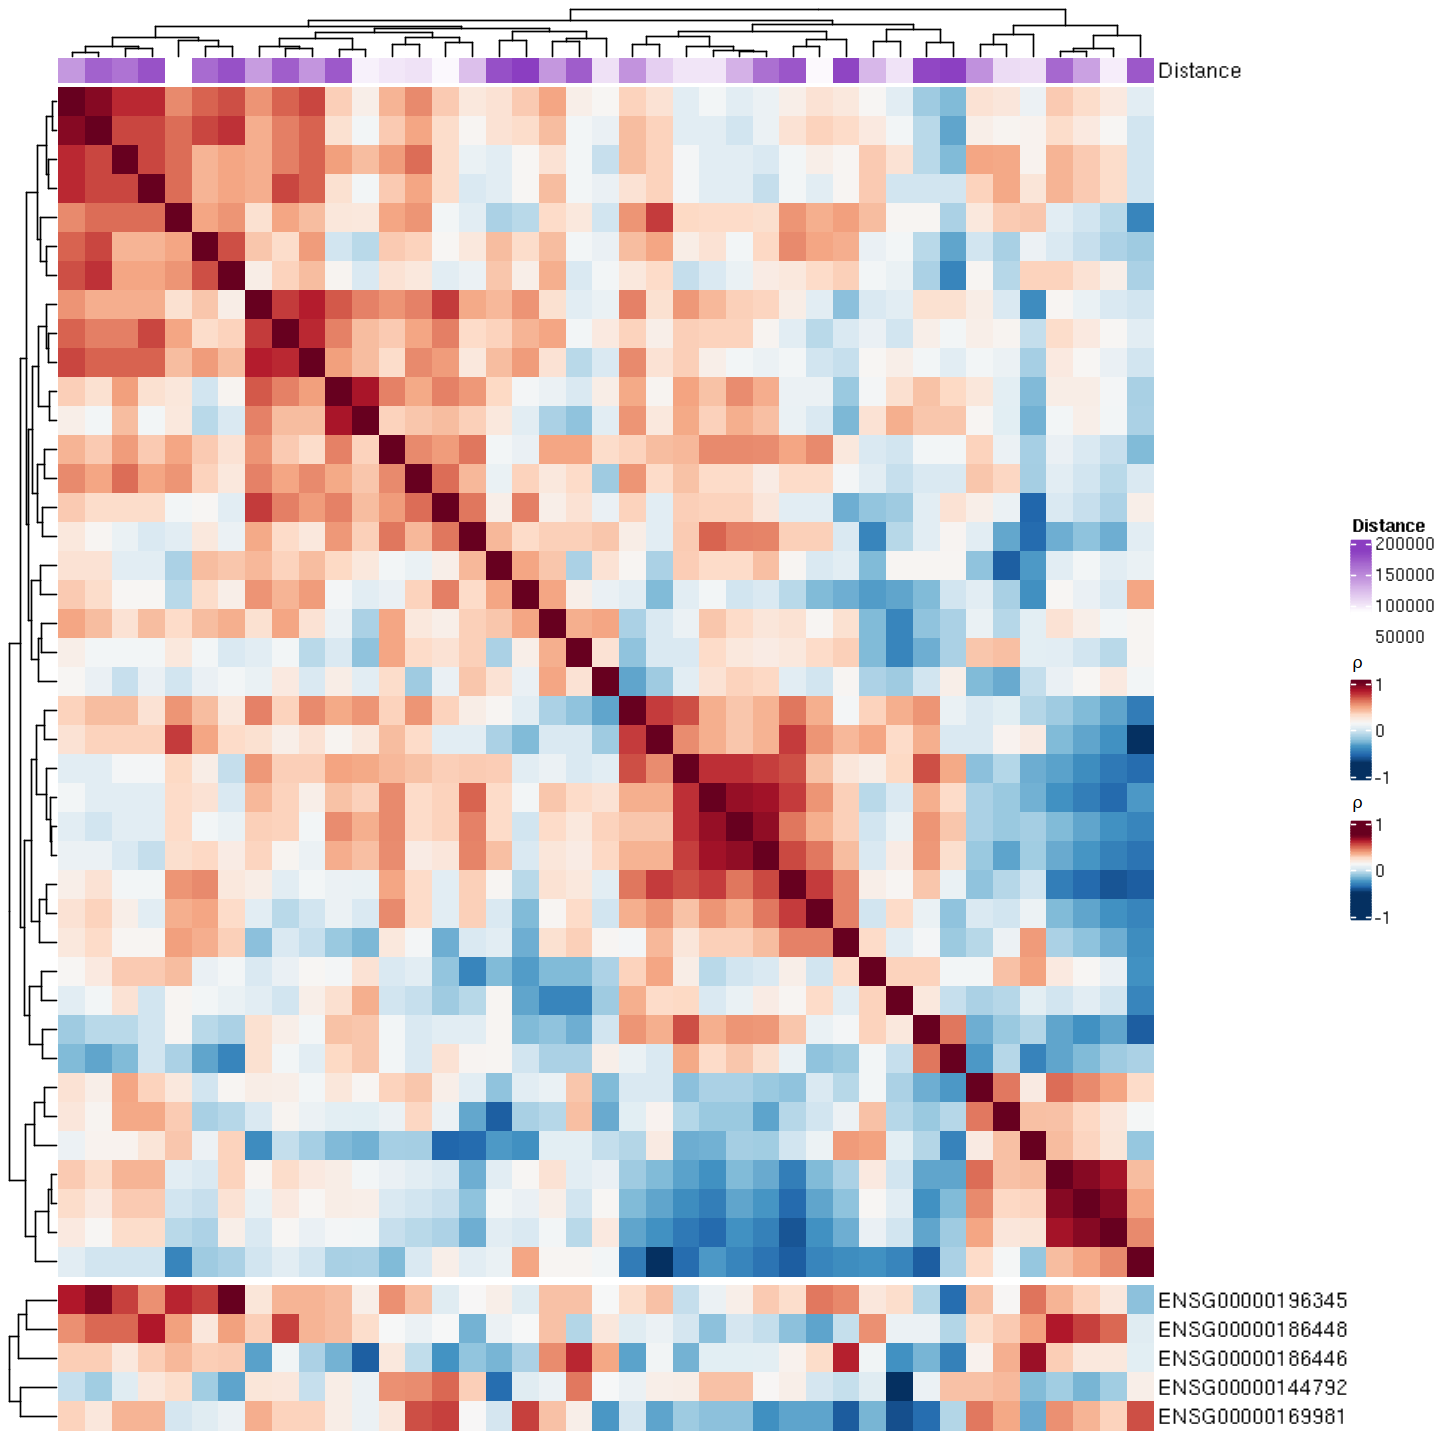

In [145]:
options(repr.plot.width=12, repr.plot.height=12)

colors <- colorRampPalette(rev(brewer.pal(11, "RdBu")))(101)
column_ha = HeatmapAnnotation(Distance=annot)
h1 <- Heatmap(cor.mtx, col=colors, show_column_names=F, show_row_names=F, top_annotation = column_ha, heatmap_legend_param=list(
    title=bquote(rho), at=c(-1, 0, 1)
))
h2 <- Heatmap(cor.mtx.gene, col=colors, show_column_names=F, heatmap_legend_param=list(
    title=bquote(rho), at=c(-1, 0, 1)
))
h1 %v% h2